In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()

In [4]:
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

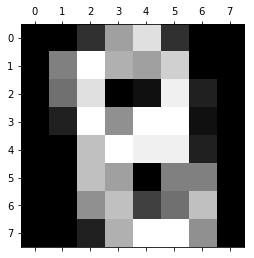

In [10]:
plt.gray()
plt.matshow(digits.images[500])

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()
knn.fit(digits.data, digits.target)
pred = knn.predict(digits.data)

In [16]:
pred[500]

8

In [31]:
from sklearn.model_selection import train_test_split

x_tv, x_test, y_tv, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_tv, y_tv, test_size=0.2, random_state=42)

In [27]:
x_train.shape

(1077, 64)

In [28]:
x_val.shape

(270, 64)

In [29]:
x_test.shape

(450, 64)

In [21]:
from sklearn.metrics import accuracy_score

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
accuracy_score(y_true=y_val, y_pred=knn.predict(x_val))

0.9888888888888889

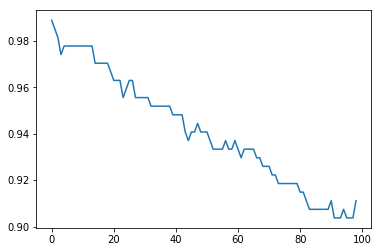

In [32]:
scores = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    scores.append(accuracy_score(y_true=y_val, y_pred=knn.predict(x_val)))

plt.plot(scores)    

In [33]:
np.max(scores), np.argmax(scores)+1

(0.9888888888888889, 1)

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
accuracy_score(y_true=y_test, y_pred=knn.predict(x_test))

0.98

In [35]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
accuracy_score(y_true=y_val, y_pred=gnb.predict(x_val))

0.8407407407407408

In [36]:
from sklearn.cluster import KMeans


In [47]:
km = KMeans(n_clusters=10)

res = km.fit(x_train)

In [48]:
res

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
res.cluster_centers_[0].shape

(64,)

In [78]:
c1 = res.cluster_centers_[7].reshape(8,8)

<Figure size 432x288 with 0 Axes>

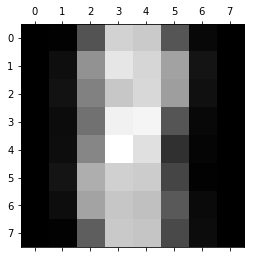

In [79]:
plt.gray()
plt.matshow(c1);

In [84]:
y_train[res.labels_ == 0]

array([3, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 4, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7,
       7, 7, 7, 3, 7, 8, 7, 7, 9, 7, 7, 3, 7, 7, 7, 7, 2, 7, 7, 7, 9, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 9, 7,
       7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7])

(array([  4.,   3.,   3.,   0.,   0.,   0.,   0., 106.,   3.,   5.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <a list of 10 Patch objects>)

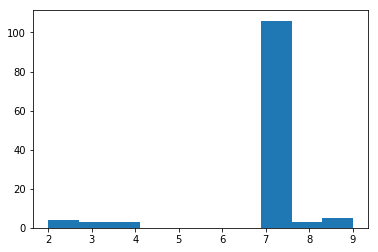

In [85]:
plt.hist(y_train[res.labels_ == 0])